In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [17]:
np.random.seed(42)
n = 1000

df = pd.DataFrame({
    "Order ID": np.arange(1, n+1),
    "Order Date": pd.date_range(start="2022-01-01", periods=n, freq="D"),
    "Customer ID": np.random.randint(1000, 2000, n),
    "Region": np.random.choice(["North", "South", "East", "West"], n),
    "Product Category": np.random.choice(["Furniture", "Office Supplies", "Technology"], n),
    "Sales": np.random.randint(50, 1000, n),
    "Quantity": np.random.randint(1, 10, n),
    "Discount": np.random.choice([0, 0.1, 0.2, 0.3, 0.4], n)
})
df["Profit"] = df["Sales"] * (1 - df["Discount"]) * np.random.uniform(0.05, 0.3, n)

print("✅ Sample retail dataset created!")
df.head()


✅ Sample retail dataset created!


,Order ID,Order Date,Customer ID,Region,Product Category,Sales,Quantity,Discount,Profit
0,1,2022-01-01,1102,North,Office Supplies,454,7,0.2,100.023737
1,2,2022-01-02,1435,North,Technology,724,9,0.3,52.606408
2,3,2022-01-03,1860,East,Furniture,627,3,0.1,152.975403
3,4,2022-01-04,1270,West,Technology,908,4,0.4,103.431019
4,5,2022-01-05,1106,North,Office Supplies,179,8,0.3,32.217391


In [18]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
print("\nData types:\n", df.dtypes)

df.describe()


Dataset shape: (1000, 9)

Missing values:
 Order ID            0
Order Date          0
Customer ID         0
Region              0
Product Category    0
Sales               0
Quantity            0
Discount            0
Profit              0
dtype: int64

Data types:
 Order ID                     int64
Order Date          datetime64[ns]
Customer ID                  int64
Region                      object
Product Category            object
Sales                        int64
Quantity                     int64
Discount                   float64
Profit                     float64
dtype: object


,Order ID,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-05-15 12:00:00,1503.929000,542.307000,4.983000,0.202600,74.308572
min,1.000000,2022-01-01 00:00:00,1000.000000,50.000000,1.000000,0.000000,2.610121
25%,250.750000,2022-09-07 18:00:00,1242.750000,298.500000,3.000000,0.100000,32.322563
50%,500.500000,2023-05-15 12:00:00,1505.000000,554.500000,5.000000,0.200000,59.353269
75%,750.250000,2024-01-20 06:00:00,1757.250000,774.250000,7.000000,0.300000,104.681721
max,1000.000000,2024-09-26 00:00:00,1998.000000,998.000000,9.000000,0.400000,275.326215
std,288.819436,NaN,289.998108,273.257337,2.607971,0.142385,53.679450


/tmp/ipython-input-3638223211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_cat.values, y=sales_by_cat.index, palette="viridis", ax=ax[0])
/tmp/ipython-input-3638223211.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_cat.values, y=profit_by_cat.index, palette="coolwarm", ax=ax[1])


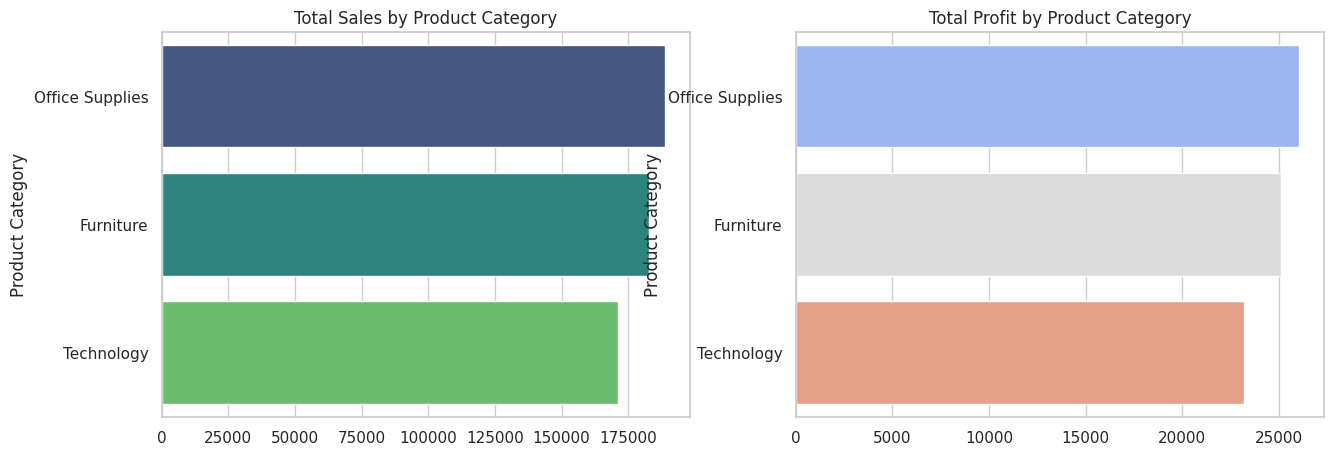

In [19]:
sales_by_cat = df.groupby("Product Category")["Sales"].sum().sort_values(ascending=False)
profit_by_cat = df.groupby("Product Category")["Profit"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=sales_by_cat.values, y=sales_by_cat.index, palette="viridis", ax=ax[0])
ax[0].set_title("Total Sales by Product Category")
sns.barplot(x=profit_by_cat.values, y=profit_by_cat.index, palette="coolwarm", ax=ax[1])
ax[1].set_title("Total Profit by Product Category")
plt.show()


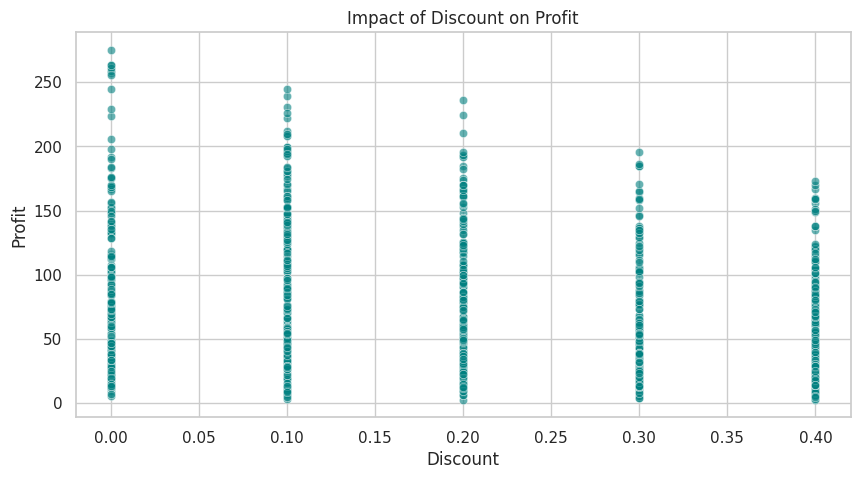

In [20]:
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.6, color="teal")
plt.title("Impact of Discount on Profit")
plt.show()


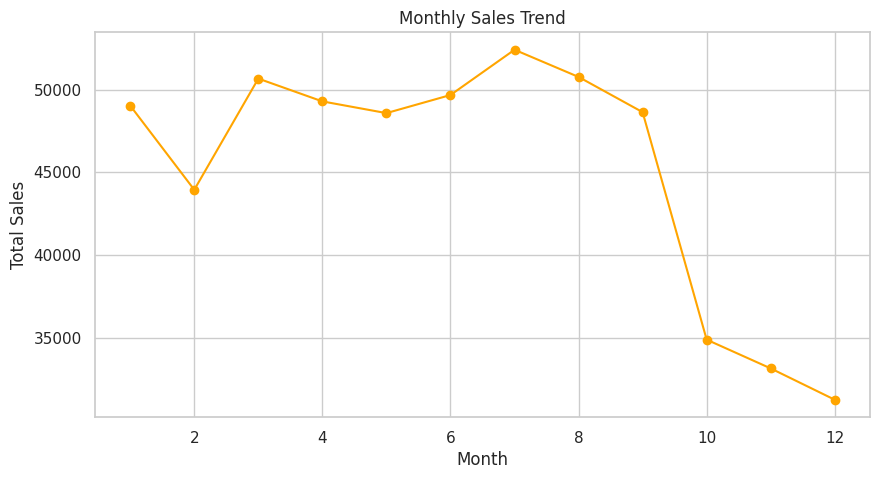

In [21]:
df["Month"] = df["Order Date"].dt.month
monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(kind="line", marker="o", color="orange", title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


/tmp/ipython-input-4101409580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_r")


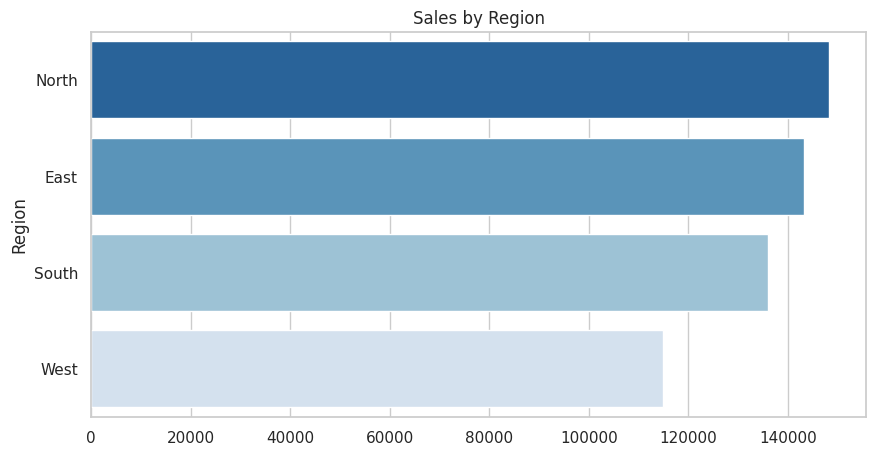

In [22]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_r")
plt.title("Sales by Region")
plt.show()


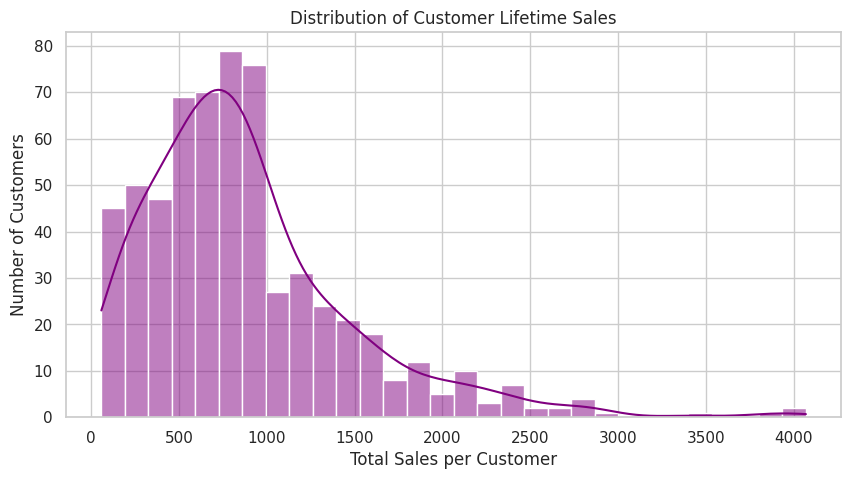

In [23]:
customer_sales = df.groupby("Customer ID")["Sales"].sum()
sns.histplot(customer_sales, bins=30, kde=True, color="purple")
plt.title("Distribution of Customer Lifetime Sales")
plt.xlabel("Total Sales per Customer")
plt.ylabel("Number of Customers")
plt.show()
